## Independent mixture models
## 3.1 Lab work
### 3.1.1 Modelling
**A priori (before reading the data), do you think a two-state Gaussian model could be appropriate? Why?**

It seems that Gaussian mixtures in this case works. Because the stroke vectors associated with letter A have 2 main directions so these points will form 2 clusters.

### 3.1.2 Data analysis: Gaussian model
#### 1. Plot the data set. Estimate model and prove the reestimation formula

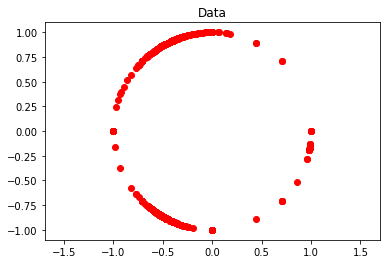

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture

X_train = np.loadtxt("Amerge.txt")

# display predicted scores by the model as a contour plot
x = np.linspace(-1.2, 1.2)
y = np.linspace(-1.2, 1.2)

plt.plot(X_train[:, 0], X_train[:, 1], "ro")
plt.axis('equal')
plt.title('Data')
plt.show()

**EM algorithm** for mixture of Gaussians:

Repeat until convergence: {

+ (E-Step): For each training example *i*, set:
\begin{equation}
\gamma_{ik} = p(z = k|x_i) = \frac{p(x_i|z=k)p(z=k)}{\sum_{k=1}^{K}p(x_i|z=k)p(z=k)} = \frac{\pi_k\mathcal{N}(x_i;\mu_k, \Sigma_k)}{\sum_{k=1}^{K}\pi_k\mathcal{N}(x_i;\mu_k, \Sigma_k)}
\end{equation}

+ (M-Step): Update the parameter
\begin{equation}
\pi_k = \frac{1}{N}\sum_{i=1}^{N}\gamma_{ik}\\
\mu_k = \frac{\sum_{i=1}^{N}\gamma_{ik}x_i}{\sum_{i=1}^{N}\gamma_{ik}}\\
\Sigma_k= \frac{\sum_{i=1}^{N}\gamma_{ik}(x_i - \mu_k)(x_i - \mu_k)^\top}{\sum_{i=1}^{N}\gamma_{ik}}
\end{equation}
}

**Proof of reestimation formulas**
+ Given: data set of N points $x_i, i = 1,...,N$
+ Find mixture of Gaussians (MoG) that best explains data: We assume that data are drawn independently from MoG. Now we want to maximize data log-likelihood w.r.t parameters of MoG:
\begin{equation}
\lambda = \arg\max_{\lambda \in \mathcal{C}}\sum_{i=1}^N \ln \sum_{k=1}^K \pi_kp_{\theta_k}(x_i) = \arg\max_{\lambda \in \mathcal{C}} \mathcal{l}_{x_1, ..., x_N}(\lambda)
\end{equation}
With $\mathcal{C} = \{(\pi_1, ..., \pi_K, \theta_1, ..., \theta_K) | \sum_k\pi_k = 1 \quad\mathrm{and}\quad \forall k, \pi_k \geq 0 \}$. If the states $\mathcal{z} = \{\mathrm{z_1}, ..., \mathrm{z_k} \}$ were known, we would have to maximize 
\begin{equation}
\sum_{i=1}^{N}\sum_{k=1}^K\mathbb{1}_{\{z_i = k\}}\ln\pi_kp_{\theta_k}(x_i)
\end{equation}
Assuming that $\gamma_{ik} = p(z = k|x_i)$, so $\sum_k\gamma_{ik} = 1$. Considering Jensen's inequality for concave function: $\mathbb{E}[f(X)] \leq f(\mathbb{E}[X]$ with $f(x) = \ln(x)$, we have 
\begin{equation}
\sum_{i=1}^{N}\sum_{k=1}^K\mathbb{1}_{\{z_i = k\}}\ln\pi_kp_{\theta_k}(x_i) = \sum_{i=1}^{N}\ln\sum_{k=1}^K\gamma_{ik}\frac{\pi_kp_{\theta_k}(x_i)}{\gamma_{ik}} \geq \sum_{i=1}^{N}\sum_{k=1}^K\gamma_{ik}\ln\frac{\pi_kp_{\theta_k}(x_i)}{\gamma_{ik}}
\end{equation}
Now, to find parameters of mixture of Gaussians model, we need to maximize the quantity
\begin{align*}
\sum_{i=1}^{N}\sum_{k=1}^K \gamma_{ik} \ln \frac{\frac{1}{(2\pi)^{d/2}|\Sigma_k|^{1/2}}\exp(-\frac{1}{2}(x_i - \mu_k)^\top\Sigma_k^{-1}(x_i - \mu_k))\cdot \pi_k}{\gamma_{ik}}
\end{align*}
Taking the derivative with respect to $\mu_l$, we find
\begin{align*}
&\nabla_{\mu_l}\sum_{i=1}^{N}\sum_{k=1}^K \gamma_{ik} \ln \frac{\frac{1}{(2\pi)^{d/2}|\Sigma_k|^{1/2}}\exp(-\frac{1}{2}(x_i - \mu_k)^\top\Sigma_k^{-1}(x_i - \mu_k))\cdot \pi_k}{\gamma_{ik}} \\
&= -\nabla_{\mu_l} \sum_{i=1}^{N}\sum_{k=1}^K \gamma_{ik} \frac{1}{2}(x_i - \mu_k)^\top\Sigma_k^{-1}(x_i - \mu_k) \\
&= \frac{1}{2}\sum_{i=1}^N \gamma_{il}\nabla_{\mu_l}2\mu_l^\top\Sigma_l^{-1}x_i - \mu_l^\top\Sigma_l^{-1}\mu_l \\
&= \sum_{i=1}^N \gamma_{il}(\Sigma_l^{-1}x_i - \Sigma_l^{-1}\mu_l)
\end{align*}
Setting this to zero and solving for $\mu_l$, we find
\begin{equation}
\mu_l = \frac{\sum_{i=1}^{N}\gamma_{il}x_i}{\sum_{i=1}^{N}\gamma_{il}}
\end{equation}
Taking the derivative with respect to $\Sigma_l$, we have
\begin{align*}
&\nabla_{\Sigma_l}\sum_{i=1}^{N}\sum_{k=1}^K \gamma_{ik} \ln \frac{\frac{1}{(2\pi)^{d/2}|\Sigma_k|^{1/2}}\exp(-\frac{1}{2}(x_i - \mu_k)^\top\Sigma_k^{-1}(x_i - \mu_k))\cdot \pi_k}{\gamma_{ik}} \\
&= -\nabla_{\Sigma_l} \sum_{i=1}^{N}\sum_{k=1}^K \gamma_{ik} \frac{1}{2}((x_i - \mu_k)^\top\Sigma_k^{-1}(x_i - \mu_k) + \ln|\Sigma_k|)\\
&= \frac{1}{2}\sum_{i=1}^N \gamma_{il}(\Sigma_l^{-2}(x_i - \mu_l)^\top(x_i - \mu_l) - \Sigma_l^{-1})
\end{align*}
Setting this to zero and solving for $\Sigma_l$, we find
\begin{equation}
\Sigma_l= \frac{\sum_{i=1}^{N}\gamma_{il}(x_i - \mu_l)(x_i - \mu_l)^\top}{\sum_{i=1}^{N}\gamma_{il}}
\end{equation}


In the M-step, it updates the parameters of model based on observed $\mathcal{z} = \{\mathrm{z_1}, ..., \mathrm{z_k} \}$. Since $\mathcal{z}$ is observed, the maximization of log-likelihood becomes easy to solve.

#### 2. Label data using estimated model

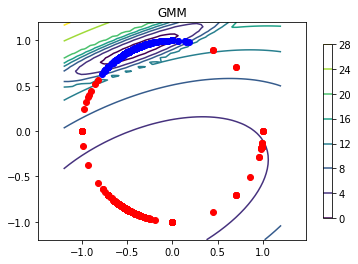

396.37899606598535

In [4]:
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X_train)
Y_predict = gmm.predict(X_train)

cluster_0 = X_train[Y_predict == 0]
cluster_1 = X_train[Y_predict == 1]

# display predicted scores by the model as a contour plot
x = np.linspace(-1.2, 1.2)
y = np.linspace(-1.2, 1.2)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.plot(cluster_0[:, 0], cluster_0[:, 1], "ro")
plt.plot(cluster_1[:, 0], cluster_1[:, 1], "bo")
plt.title('GMM')
plt.axis('equal')
plt.show()
gmm.bic(X_train)

In [5]:
gmm.covariances_

array([[[ 0.27188755,  0.0823439 ],
        [ 0.0823439 ,  0.1156479 ]],

       [[ 0.03903012,  0.01426564],
        [ 0.01426564,  0.00634938]]])

#### 3. Propose and implement a graphical (visual) method to validate the assumption of bivariate Gaussian emission distributions. What to think about this assumption?
The multivariate gaussian distribution of an n-dimentional vector $x=(x_1,x_2,...,x_n)$ may be written as:
$$p(x;\mu,\sigma) = \frac{1}{\sqrt{(2\pi)^n\|\sigma\|}}exp^{-\frac{1}{2}(x-\mu)^T\sigma^{-1}(x-\mu)}$$
Where $\mu$ is a n-dimentional vector and $\sigma$ is a $n\times n$ covariance matrix.
<br>
<a href="https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/">reference</a>

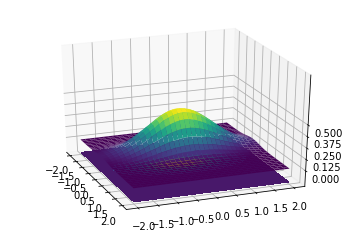

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.mean(X_train, axis=0)
Sigma = np.cov(X_train.T)


# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,1)
ax.set_zticks(np.linspace(0,0.5,5))
ax.view_init(27, -21)

plt.show()

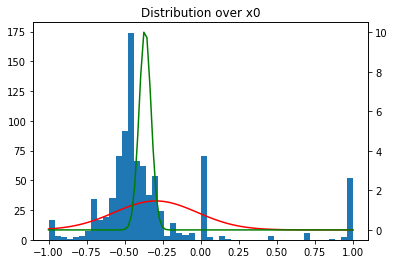

In [7]:
means = gmm.means_
covars = gmm.covariances_

fig = plt.figure()
ax1 = fig.add_subplot(111)
a = np.hstack(X_train[:, 0])
ax1.hist(a, bins=50)

ax2 = ax1.twinx()
x = np.linspace(-1, 1, num=100)
colors = ["r", "g", "y"]
for i in range(len(means)):
    mu = np.squeeze(means[i][0])
    sigma = np.squeeze(covars[i][0][0])
    y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )
    ax2.plot(x, y, color = colors[i])
    

plt.title("Distribution over x0")
plt.show()

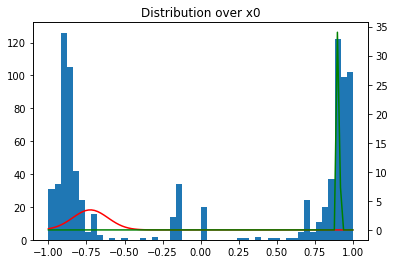

In [8]:
plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111)
a = np.hstack(X_train[:, 1])
ax1.hist(a, bins=50)

ax2 = ax1.twinx()
x = np.linspace(-1, 1, num=100)
colors = ["r", "g", "y"]
for i in range(len(means)):
    mu = np.squeeze(means[i][1])
    sigma = np.squeeze(covars[i][1][1])
    y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )
    ax2.plot(x, y, color = colors[i])
    

plt.title("Distribution over x0")
plt.show()

#### 4. Define von Mises and mixtures of von Mises distributions.


**von Mises** distribution is a continuous probability distribution on the unit circle. It may be thought of as the circular analogue of the normal distribution. The von Mises probability density function for the angle $x$ given by:

\begin{equation}
p(x; \mu, \kappa) = \frac{e^{\kappa cos(x - \mu)}}{2\pi I_0(\kappa)}
\end{equation}

Where $\mu$ is the mode and $\kappa$ is the dispersion, and $I_0(\kappa)$ is the modified Bessel function of order $0$. The parameters $\mu$ and $\frac{1}{\kappa}$ are analogous to $\mu$ and $\sigma^2$ (the mean and variance) in the normal distribution

**Mixture of von Mises** distributions: Mixture density is weighted sum of von Mises densities:

\begin{equation}
p(x) = \sum_{k=1}^{K}\pi_k\frac{e^{\kappa_k cos(x - \mu_k)}}{2\pi I_0(\kappa_k)}
\end{equation}

with $\forall k, \pi_k \geq 0$ and $\sum_{k=1}^{K}\pi_k = 1$. So parameters are $\pi_k,\mu_k$ and $\kappa_k$

#### 5. Would a mixture of von Mises distributions be more or less adequate than Gaussian mixtures on the real data set of part 3.1? Why?

**Mixture of von Mises** seems to be more adequate than **Gaussian Mixtures** on this data set. Because intuitively, the points in the data set all belong to a ellipse in the 2D space, which is totally adapted to **von Mises** distribution, when **Gaussian Mixtures** works well with data points spreading over all directions.

### 3.2 Mandatory additional questions
#### 1. Extend the scikit-learn mixture library by implementing mixtures of von Mises distributions. Justify the E-step of the EM algorithm with equations.

EM algorithm of Mixtures of von Mises distributions:
Repeat until convergence: {

+ (E-Step): For each training example *i*, set:
\begin{equation}
\gamma_{ik} = p(z = k|x_i) = \frac{p(x_i|z=k)p(z=k)}{\sum_{k=1}^{K}p(x_i|z=k)p(z=k)} = \frac{\pi_k\mathcal{V}(x_i;\mu_k, \kappa_k)}{\sum_{k=1}^{K}\pi_k\mathcal{V}(x_i;\mu_k, \kappa_k)}
\end{equation}

+ (M-Step): Update the parameter
\begin{equation}
\pi_k = \frac{1}{N}\sum_{i=1}^{N}\gamma_{ik}\\
\mu_k = \arctan(\frac{\sum_{i=1}^{N}\gamma_{ik}\sin x_i}{\sum_{i=1}^{N}\gamma_{ik}\cos x_i})\\
A(\kappa_k)= \frac{\sum_{i=1}^{N}\gamma_{ik}\cos(x_i - \mu_k)}{\sum_{i=1}^{N}\gamma_{ik}}
\end{equation}
The value of $\kappa_k$ can be computed by approximating the value of $A_2^{-1}(x)$ by
\begin{equation}
A_2^{-1}(x) \approx \frac{2x - x^3}{1 - x^2}
\end{equation}
}

See "VonMiseMixture.py" for details.

#### 2. What is a consistent estimator of mixture parameters? Imagine, describe and implement a protocol to evaluate consistency of any arbitrary estimator. Test this protocol on the algorithm developed in the previous question.

#### 3. Use a 2-state mixture of von Mises distributions on the real data set of part 3.1. Transform the data to angular data. Provide a quantitative and a graphical way to compare the fitted mixture of von Mises distributions with the Gaussian mixture obtained in part 3.1.

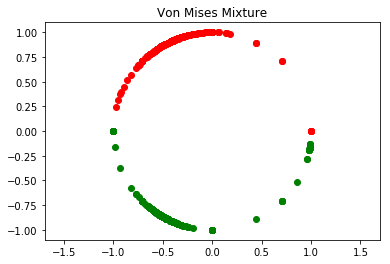

In [9]:
from VonMiseMixture import *
from spherecluster import VonMisesFisherMixture
color = ["ro", 'go', 'bo', 'co']
X_train = np.loadtxt("Amerge.txt")

X = X_train[:, 0]
Y = X_train[:, 1]
theta = np.arctan2(Y,X).reshape(-1,1)
vmm = VonMisesFisherMixture(n_clusters=2, posterior_type='soft')
vmm.fit(X_train)
Y_predict = vmm.predict(X_train)

cluster_0 = X_train[Y_predict == 0]
cluster_1 = X_train[Y_predict == 1]
for i in range(len(X_train)):
    plt.plot(X_train[i, 0], X_train[i, 1], color[int(Y_predict[i])])



plt.title('Von Mises Mixture')
plt.axis('equal')
plt.show()

In [10]:
vmm.weights_

array([ 0.47068774,  0.52931226])

[[ 1.95339151]
 [-1.96351521]]


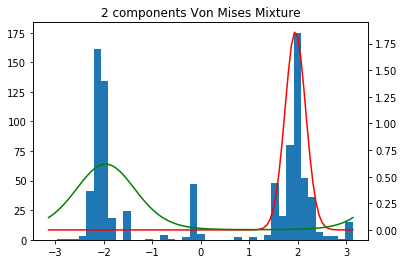

-101.034056626


In [11]:
#Retrieve vmm parameters

means = vmm.cluster_centers_
X = means[:, 0]
Y = means[:, 1]
means = np.arctan2(Y,X).reshape(-1,1)
kappas = vmm.concentrations_
print(means)
fig = plt.figure()
ax1 = fig.add_subplot(111)
a = np.hstack(theta)
ax1.hist(a, bins=40)

ax2 = ax1.twinx()
x = np.linspace(- np.pi, np.pi, num=100)
colors = ["r", "g", "y"]
for i in range(len(kappas)):
    mu = np.squeeze(means[i])

    kappa = np.squeeze(kappas[i])
    y = np.exp(kappa*np.cos(x-mu))/(2*np.pi*np.i0(kappa))
    ax2.plot(x, y, color = colors[i])


plt.title("2 components Von Mises Mixture")
plt.show()

print(vmm.score(X_train))

In [9]:
num_components = 2

n = len(theta)
k = num_components * 3
BIC_theta = np.log(n) * k - 2 * vmm.score(theta) * n

print(vmm.bic(theta))

2163.12633727


In [10]:
angular_gmm = GaussianMixture(n_components=2, covariance_type='full')
angular_gmm.fit(theta)
angular_gmm.bic(theta)

2428.5203482857924

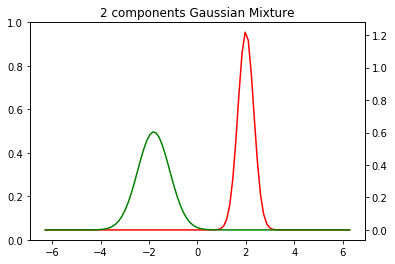

-1.19347477949


In [11]:
means = angular_gmm.means_
covs = angular_gmm.covariances_

fig = plt.figure()
ax1 = fig.add_subplot(111)
a = np.hstack(theta)
#ax1.hist(a, bins=40)

ax2 = ax1.twinx()
x = np.linspace(-2 * np.pi, 2 * np.pi, num=100)
colors = ["r", "g", "y"]
for i in range(len(means)):
    mu = np.squeeze(means[i])
    sigma2 = np.squeeze(covs[i])
    y = 1 / np.sqrt(sigma2 * 2 * np.pi) * np.exp(-(x - mu)**2 / (2 * sigma2))
    ax2.plot(x, y, color = colors[i])


plt.title("2 components Gaussian Mixture")
plt.show()

print(vmm.score(theta))

In [21]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

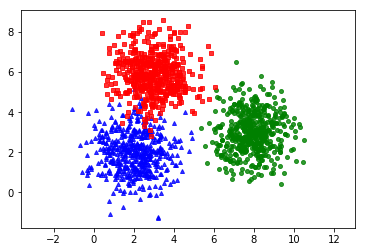

In [22]:
color = ["b^", 'go', 'rs', 'c*']
def clusters_display(X, label):
    K = np.amax(label) + 1
    
    for i in range(len(X)):   
        plt.plot(X[i, 0], X[i, 1], color[label[i]], markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
clusters_display(X, original_label)

2
2
3
3
3
3


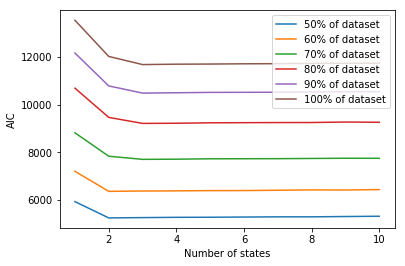

In [23]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
line = []
for i in range(5, 11):
    X_batch = X[: 150 * i]
    bic = []
    for j in range(1, 11):
        
    #vmm = vonMisesMixture(n_components=2)
    #vmm.fit(theta_batch)
    #print(vmm.bic(theta_batch))
        angular_gmm = GaussianMixture(n_components=j, covariance_type='full')
        angular_gmm.fit(X_batch)
        score = angular_gmm.aic(X_batch)
        bic.append(score)
    line.append(bic)
    
for i in range(len(line)):
    plt.plot(x, line[i], label = str(i * 10 + 50) + "% of dataset")
    print(np.argmin(line[i]) + 1)

plt.legend()
plt.xlabel("Number of states")
plt.ylabel("AIC")
plt.show()

3
3
3
3
3
3


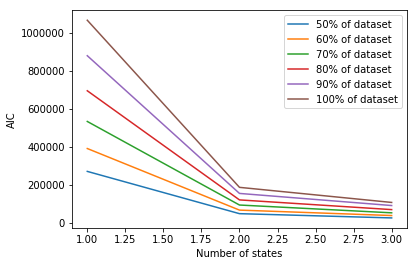

In [73]:
m = theta.shape[0]
n_features = X_train.shape[0]
x = [1, 2, 3]
line = []
for i in range(5, 11):
    X_batch = X_train[: 90 * i]
    aic = []
    for j in range(1, 4):
        
        vmm = VonMisesFisherMixture(n_clusters=j, posterior_type='soft')
        vmm.fit(X_batch)
        n_parameters = n_features * j * 2 + j - 1
        score = -2 * vmm.score(X_batch) * X_batch.shape[0] + 2 * n_parameters
        aic.append(score)
    line.append(aic)
    
for i in range(len(line)):
    plt.plot(x, line[i], label = str(i * 10 + 50) + "% of dataset")
    print(np.argmin(line[i]) + 1)

plt.legend()
plt.xlabel("Number of states")
plt.ylabel("AIC")
plt.show()